## Financial Securities and Markets Final Project

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
import copy as copylib
from progressbar import *
import pandas as pd
import numpy
from matplotlib import pylab
from pylab import *
from scipy.stats import norm

pylab.rcParams['figure.figsize'] = (16, 4.5)
numpy.random.seed(0)
#Read Interest Rate Data
dataframe =  pd.read_csv('hjm_data.csv').set_index('time') / 100 # Convert interest rates to %
pd.options.display.max_rows = 10
display(dataframe)

,1/12/2022,1/2/2022,1,1.5,2,2.5,3,3.5,4,4.5,...,20.5,21,21.5,22,22.5,23,23.5,24,24.5,25
time,,,,,,,,,,,,,,,,,,,,,
1,0.057734,0.064382,0.067142,0.066512,0.064991,0.063255,0.061534,0.059925,0.058444,0.057058,...,0.034194,0.034772,0.035371,0.035985,0.036612,0.037252,0.037902,0.038562,0.039231,0.039908
2,0.057680,0.064506,0.067502,0.066842,0.065423,0.063852,0.062301,0.060846,0.059490,0.058198,...,0.033790,0.034437,0.035108,0.035798,0.036504,0.037224,0.037959,0.038705,0.039461,0.040227
3,0.057758,0.064410,0.067354,0.066845,0.065577,0.064109,0.062611,0.061164,0.059782,0.058438,...,0.032706,0.033294,0.033907,0.034539,0.035188,0.035853,0.036533,0.037224,0.037927,0.038639
4,0.057430,0.064103,0.066942,0.066215,0.064904,0.063462,0.062006,0.060601,0.059252,0.057933,...,0.031325,0.031891,0.032486,0.033106,0.033748,0.034409,0.035088,0.035784,0.036493,0.037214
5,0.057412,0.063978,0.066358,0.065502,0.064168,0.062722,0.061262,0.059849,0.058488,0.057157,...,0.030119,0.030667,0.031250,0.031862,0.032499,0.033161,0.033844,0.034546,0.035264,0.035997
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1260,0.046421,0.045093,0.042471,0.042081,0.042663,0.043224,0.043640,0.043940,0.044156,0.044314,...,0.040260,0.040098,0.039950,0.039813,0.039687,0.039571,0.039464,0.039365,0.039273,0.039187
1261,0.046233,0.044976,0.042452,0.042131,0.042726,0.043285,0.043699,0.043998,0.044214,0.044374,...,0.040307,0.040147,0.039999,0.039863,0.039737,0.039621,0.039514,0.039414,0.039320,0.039233
1262,0.046348,0.045311,0.043295,0.043266,0.043963,0.044565,0.045003,0.045323,0.045560,0.045739,...,0.041276,0.041118,0.040972,0.040840,0.040718,0.040607,0.040505,0.040411,0.040324,0.040244


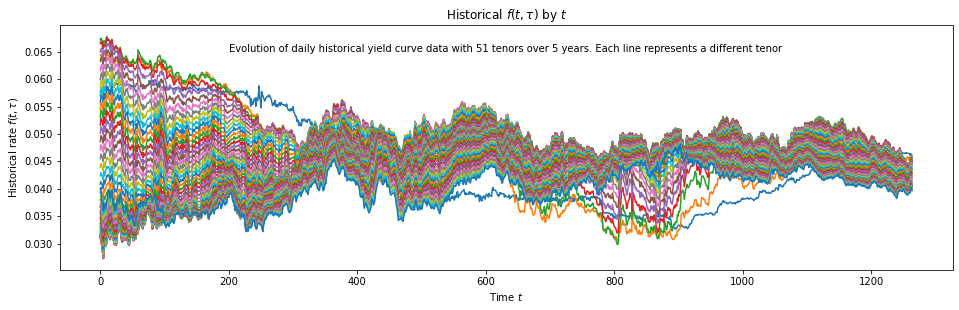

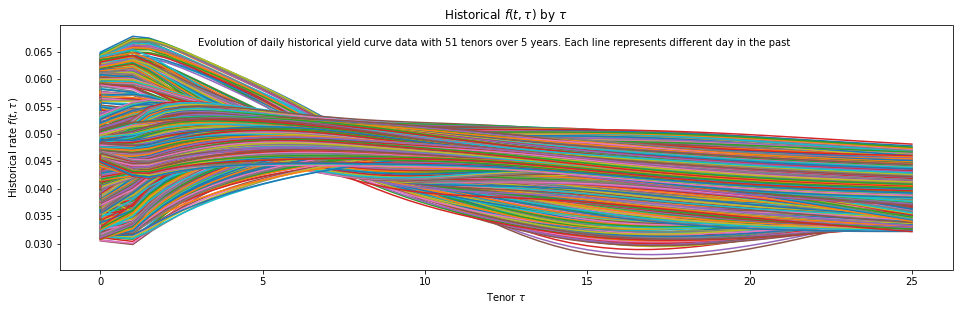

In [ ]:
#Get list of dates
hist_timeline = list(dataframe.index)
tenors = [eval(x) for x in dataframe.columns]
hist_rates = matrix(dataframe)

#Plot historical forward rate v.s t
plot(hist_rates), xlabel(r'Time $t$'), 
ylabel(r'Historical rate $f(t,\tau)$'), text(200, 0.065, r'Evolution of daily historical yield curve data with 51 tenors over 5 years. Each line represents a different tenor'),
title(r'Historical $f(t,\tau)$ by $t$'), show();
#Plot historical forward rate v.s tenor
plot(tenors, hist_rates.transpose()), xlabel(r'Tenor $\tau$'), 
ylabel(r'Historical rate $f(t,\tau)$'), text(3, 0.066, r'Evolution of daily historical yield curve data with 51 tenors over 5 years. Each line represents different day in the past'),
title(r'Historical $f(t,\tau)$ by $\tau$'), show();

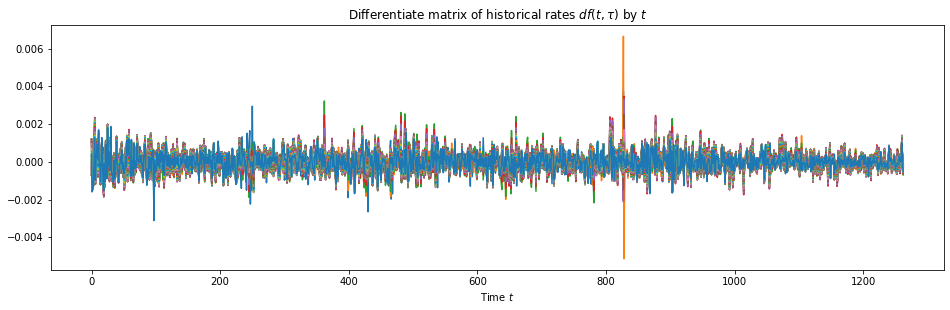

Sigma shape : (51, 51)
Eigenvalues :
[2.02884026e-03 4.62889282e-04 1.63677691e-04 8.47948767e-05
 5.10134525e-05 3.26491422e-05 1.53862297e-05 3.90765854e-06
 1.45385608e-06 3.99451236e-07 7.74123147e-08 2.25094244e-08
 6.81015644e-09 2.04941493e-09 8.30654947e-10 3.18422245e-10
 1.69855176e-10 1.20686709e-10 8.18818675e-11 4.65678731e-11
 2.41691330e-11 1.26818337e-11 7.83625735e-12 4.07031445e-12
 2.61695757e-12 1.78999756e-12 1.07235511e-12 6.26514632e-13
 3.36669763e-13 2.89485592e-13 2.09893594e-13 2.02355379e-13
 1.20792326e-13 9.80002681e-14 7.30539107e-14 5.84913877e-14
 5.01860718e-14 4.50412065e-14 4.25136155e-14 3.00503786e-14
 1.99691814e-14 1.44931169e-14 8.67085382e-15 6.67525091e-15
 5.37128999e-15 4.23435567e-15 2.52344999e-15 1.26741476e-15
 4.34926952e-17 1.87394617e-16 2.51628568e-16]
Principal eigenvalues
[0.00202884 0.00046289 0.00016368]

Principal eigenvectors
[[ 0.00351033 -0.00972625 -0.00111508]
 [ 0.05665586 -0.16326718  0.27313784]
 [ 0.10114279 -0.2389149 

In [ ]:
#Apply PCA to find principle components for historical volatility
diff_rates = diff(hist_rates, axis=0)
assert(hist_rates.shape[1]==diff_rates.shape[1])
plot(diff_rates), xlabel(r'Time $t$'), title(r'Differentiate matrix of historical rates $df(t,\tau)$ by $t$'), show();
# Calculate covariance matrix
sigma = cov(diff_rates.transpose())
print("Sigma shape : " + str(sigma.shape))
sigma *= 252
eigval, eigvec = linalg.eig(sigma)
eigvec=matrix(eigvec)
assert type(eigval) == ndarray
assert type(eigvec) == matrix
print("Eigenvalues :")
print(eigval)
factors=3
index_eigvec = list(reversed(eigval.argsort()))[0:factors]   # highest principal component first in the array
princ_eigval = array([eigval[i] for i in index_eigvec])
princ_comp = hstack([eigvec[:,i] for i in index_eigvec])
print("Principal eigenvalues")
print(princ_eigval)
print()
print("Principal eigenvectors")
print(princ_comp)

[[ 0.05665586 -0.16326718  0.27313784]]


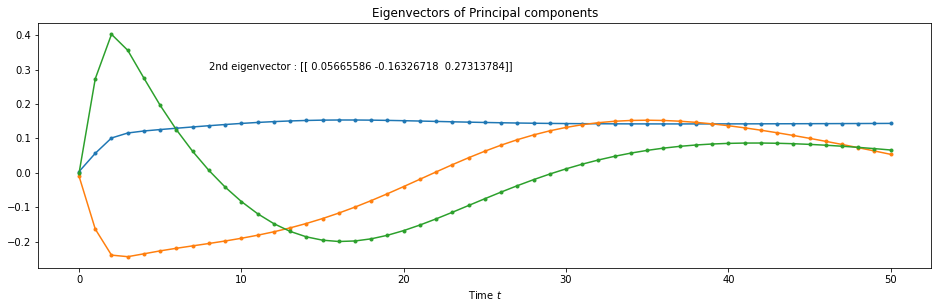

vols shape: (51, 3)


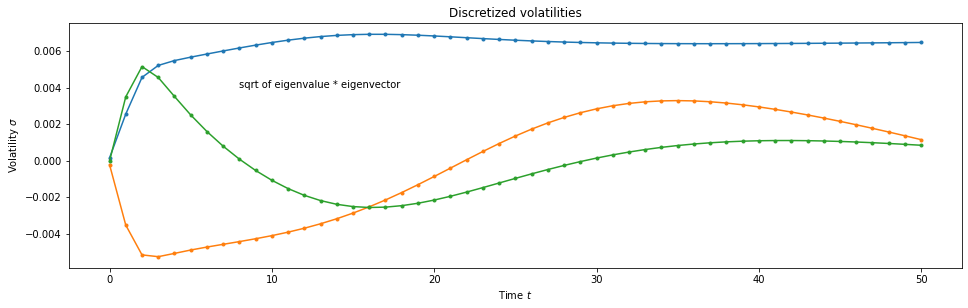

In [ ]:
#Plot principle eigenvectors 
eigenvector1_text=str(princ_comp[1])
print(eigenvector1_text)
plot(princ_comp, marker='.'), title('Eigenvectors of Principal components'), 
xlabel(r'Time $t$'), text(8, 0.3, '2nd eigenvector : {}'.format(eigenvector1_text)),show();
sqrt_eigval = matrix(princ_eigval ** .5)
tmp_m = vstack([sqrt_eigval for i in range(princ_comp.shape[0])])  # resize matrix (1,factors) to (n, factors)
vols = multiply(tmp_m, princ_comp) # multiply matrice element-wise
print('vols shape: ' + str(vols.shape))
plot(vols, marker='.'), title('Discretized volatilities'),
xlabel(r'Time $t$'), ylabel(r'Volatility $\sigma$'), text(8, 0.004, 'sqrt of eigenvalue * eigenvector'), show();

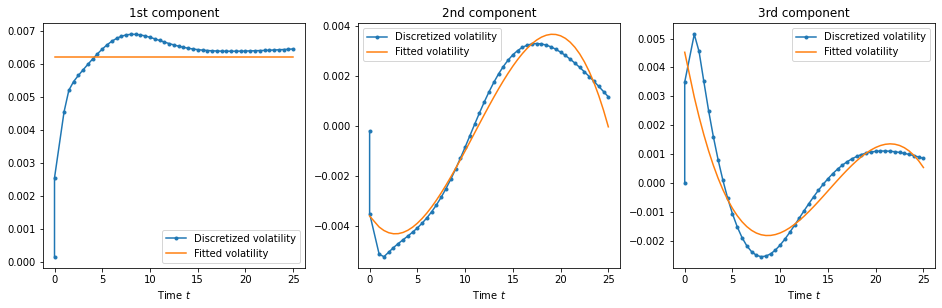

In [ ]:
#Define functions for fitting volatility
def get_matrix_column(mat, i):
    return array(mat[:,i].flatten())[0]

class PolynomialInterpolator:
    def __init__(self, params):
        assert type(params) == ndarray
        self.params = params
    def calc(self, x):
        n = len(self.params)
        C = self.params
        X = array([x**i for i in reversed(range(n))])
        return sum(multiply(X, C))
        
fitted_vols = []

def fit_volatility(i, degree, title):
    vol = get_matrix_column(vols, i)
    fitted_vol = PolynomialInterpolator(polyfit(tenors, vol, degree))    
    plot(tenors, vol, marker='.', label='Discretized volatility')
    plot(tenors, [fitted_vol.calc(x) for x in tenors], label='Fitted volatility')
    plt.title(title), xlabel(r'Time $t$'), legend();
    fitted_vols.append(fitted_vol)
    
subplot(1, 3, 1), fit_volatility(0, 0, '1st component');
subplot(1, 3, 2), fit_volatility(1, 3, '2nd component');
subplot(1, 3, 3), fit_volatility(2, 3, '3rd component');
show()

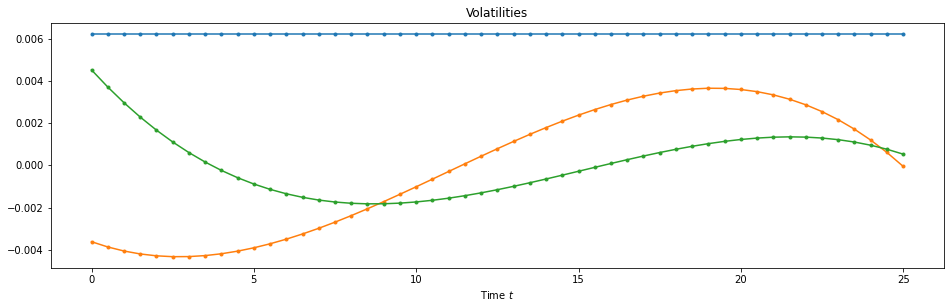

In [ ]:
def integrate(f, x0, x1, dx):
    n = (x1-x0)/dx+1
    out = 0
    for i, x in enumerate(linspace(x0, x1, int(n))):
        if i==0 or i==n-1:
            out += 0.5 * f(x)
        else:
            out += f(x)  # not adjusted by *0.5 because of repeating terms x1...xn-1 - see trapezoidal rule
    out *= dx
    return out
    
mc_tenors = linspace(0,25,51)
# Discretize fitted volfuncs for the purpose of monte carlo simulation
mc_vols = matrix([[fitted_vol.calc(tenor) for tenor in mc_tenors] for fitted_vol in fitted_vols]).transpose()
plot(mc_tenors, mc_vols, marker='.'), xlabel(r'Time $t$'), title('Volatilities'), show();

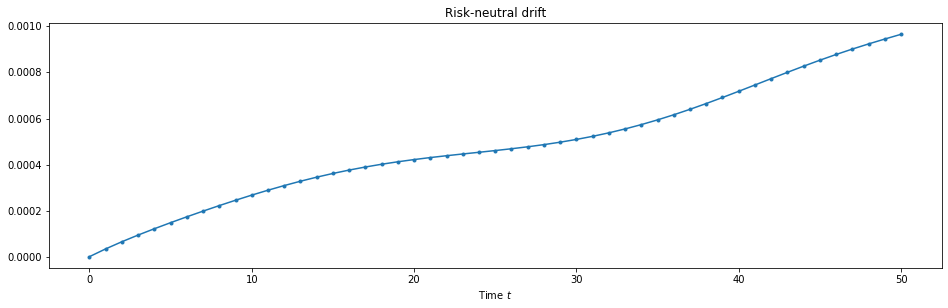

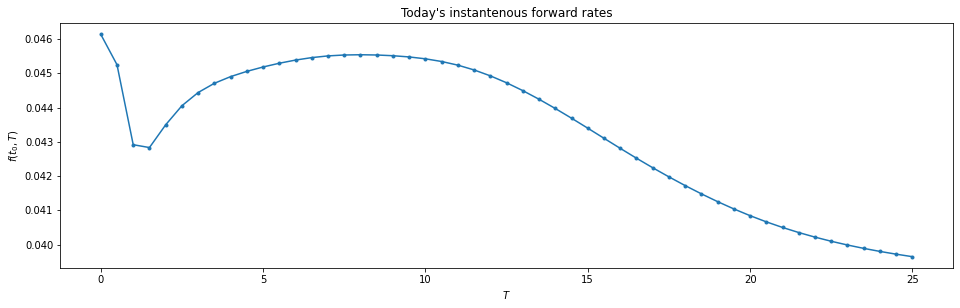

In [ ]:
def integration_all(tau, fitted_vols, t):
    #This funciton carries out integration for all principal factors. 
    #It uses the fact that volatility is function of time in HJM model
    out = 0.
    for fitted_vol in fitted_vols:
        assert isinstance(fitted_vol, PolynomialInterpolator)
        out += integrate(fitted_vol.calc, t, tau+t, 0.01) * fitted_vol.calc(tau)
    return out
    
#Calculate Risk Neutral Drift
#Drift for t = 0
mc_drift = array([integration_all(tau, fitted_vols, 0) for tau in mc_tenors])
plot(mc_drift, marker='.'), xlabel(r'Time $t$'), title('Risk-neutral drift'), show();
curve_spot = array(hist_rates[-1,:].flatten())[0]
plot(mc_tenors, curve_spot.transpose(), marker='.'), ylabel('$f(t_0,T)$'), xlabel("$T$"), 
title('Today\'s instantenous forward rates'), show();

In [ ]:
def simulation(f, tenors, vols, timeline):
    assert type(tenors)==ndarray
    assert type(f)==ndarray
    assert len(f)==len(tenors)
    vols = array(vols.transpose())  # 3 rows, T columns
    len_tenors = len(tenors)
    len_vols = len(vols)
    yield timeline[0], copylib.copy(f)
    drift = [array([integration_all(tau, fitted_vols, t) for tau in mc_tenors]) for t in timeline]
    for it in range(1, len(timeline)):
        t = timeline[it]
        dt = t - timeline[it-1]
        sqrt_dt = sqrt(dt)
        fprev = f
        drift_t = drift[it-1]
        f = copylib.copy(f)
        random_numbers = [normal() for i in range(len_vols)]
        for iT in range(len_tenors):
            val = fprev[iT] + drift_t[iT] * dt
      
            sum = 0
            for iVol, vol in enumerate(vols):
                sum += vol[iT] * random_numbers[iVol]
            val += sum * sqrt_dt
            
            iT1 = iT+1 if iT<len_tenors-1 else iT-1   # if we can't take right difference, take left difference
            dfdT = (fprev[iT1] - fprev[iT]) / (iT1 - iT)
            val += dfdT * dt
            
            f[iT] = val
        yield t,f

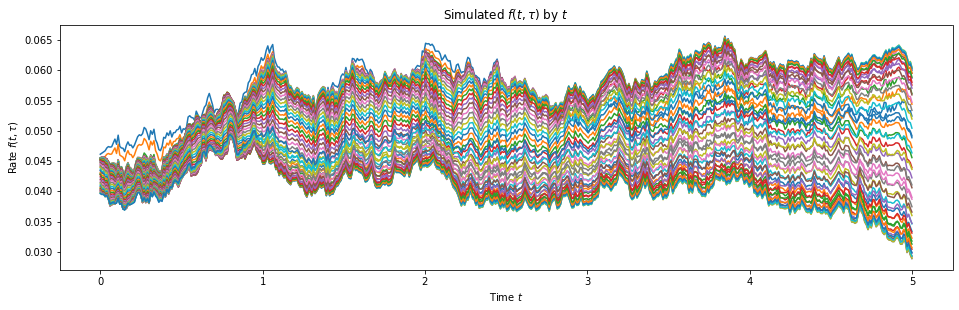

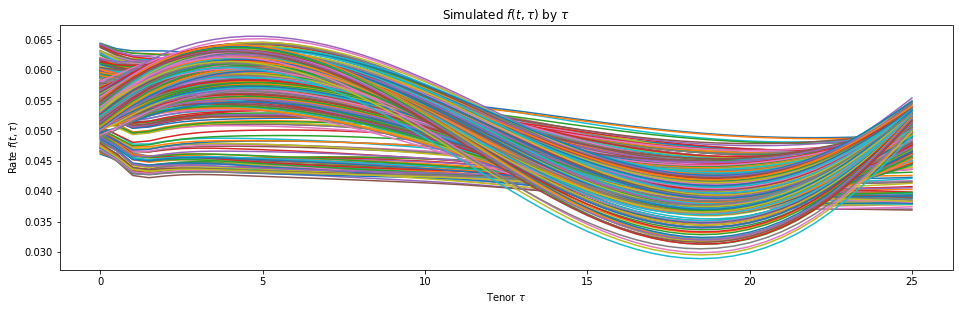

In [ ]:
#Plot simulated forward rates
proj_rates = []
proj_timeline = linspace(0,5,500)

for i, (t, f) in enumerate(simulation(curve_spot, mc_tenors, mc_vols, proj_timeline)):
    proj_rates.append(f)
proj_rates = matrix(proj_rates)
plot(proj_timeline.transpose(), proj_rates), xlabel(r'Time $t$'), ylabel(r'Rate $f(t,\tau)$');
title(r'Simulated $f(t,\tau)$ by $t$'), show();
plot(mc_tenors, proj_rates.transpose()), xlabel(r'Tenor $\tau$'), ylabel(r'Rate $f(t,\tau)$');
title(r'Simulated $f(t,\tau)$ by $\tau$'), show();

In [ ]:
def all_forward_rates_at_t(f, tenors, vols, t):
  proj_timeline = [t]
  #Get all forward rates needed
  forward_rates = []
  for i, (t, f) in enumerate(simulation(f, tenors, vols, proj_timeline)):
    forward_rates.append(f)
  return forward_rates[0]

In [ ]:
def bond_price(f, tenors, vols, t, T):
  #calculate bond price with maturity T at time t
  forward_rates = all_forward_rates_at_t(f, tenors, vols, t)
  #Calculate bond price
  exponents = 0
  for i in range(len(tenors)):
    if t+tenors[i]>T:
      break
    exponents-=forward_rates[i]

  bond_price = np.exp(exponents)
  return bond_price

In [ ]:
bond_price(curve_spot, mc_tenors, mc_vols, 0, 2)

0.802008422684817

In [ ]:
def Libor_rate(t, S, T, p1, p2):
  #Calculate Libor rate
  #p1: p(t, S), p2: p(t,T)
  return 1/(T-S) * ((p1-p2)/p2)

In [ ]:
p1 = bond_price(curve_spot, mc_tenors, mc_vols, 0, 2)
p2 = bond_price(curve_spot, mc_tenors, mc_vols, 0, 3)
Libor_rate(0, 2, 3, p1, p2)

0.09252694318746853

In [ ]:
#Find Implied Volatility given option prices

#Calculating price for a standard Call Option using BS 
def bs_call(S, K, T, r, vol):
    d1 = (np.log(S/K) + (r + 0.5*vol**2)*T) / (vol*np.sqrt(T))
    d2 = d1 - vol * np.sqrt(T)
    return S * norm.cdf(d1) - np.exp(-r * T) * K * norm.cdf(d2)

#Calculating vega
def bs_vega(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma ** 2) * T) / (sigma * np.sqrt(T))
    return S * norm.pdf(d1) * np.sqrt(T)

#find implied volatility
def find_vol(target_value, S, K, T, r, *args):
    MAX_ITERATIONS = 200
    PRECISION = 1.0e-5
    sigma = 0.5
    for i in range(0, MAX_ITERATIONS):
        price = bs_call(S, K, T, r, sigma)
        vega = bs_vega(S, K, T, r, sigma)
        diff = target_value - price  
        if (abs(diff) < PRECISION):
            return sigma
        sigma = sigma + diff/vega # f(x) / f'(x)
    return sigma 

In [ ]:
#Dynamics for St
from  numpy.random import default_rng         #  numpy randon number generator routines

def ST(S0, dt, r, cor, sigma_f, sigma_s, T, rng):
  """Simulate St (underlying) for Quanto Option
       process dS_t = (r-cor*sigma_f*sigma_s)*S_t*dt + sigma_s*S_t*dW_t.
    Arguments
    S0:  (type = float) start value of the paths
    r: interest rate in Japan
    cor: correlation between exchange rate and Japanese Index (historical average)
    sigma_f: volatility of exchange rate (historical average)
    sigma_s: volatility of Japanese Index for Nikke (Implied volatility)
    T: Final(stopping) time
    dt: time increments
    rng: an instance of a random number generator: np.random.Generator
    
    return: tracking error (float)
    """
  St = S0
  t = 0
  while t < T:
    St += (r-cor*sigma_f*sigma_s)*St*dt + sigma_s*St*rng.standard_normal(1)*np.sqrt(dt)
    t+=dt

  return St

In [ ]:
def pricing_the_contract(S0, dt, r, cor, sigma_f, sigma_s, T, rng, k, k_, mc_tenors, mc_vols, f0):
  #Calculate ST
  ST = ST(S0, dt, r, cor, sigma_f, sigma_s, T, rng)
  #Calculte Bond prices for Libor rate
  p1 = bond_price(curve_spot, mc_tenors, mc_vols, T, T+dt) #needs to be modfied for time-varing drift and vol
  p2 = bond_price(curve_spot, mc_tenors, mc_vols, T, T)
  p3 = bond_price(curve_spot, mc_tenors, mc_vols, 0, T+dt)
  p4 = bond_price(curve_spot, mc_tenors, mc_vols, 0, T)
  #Calculate Libor rate
  L1 = Libor_rate(T, T, T+dt, p1, p2)
  L2 = Libor_rate(0, T, T+dt, p3, p4)

  return max(0, ((ST/S0)-k) * (k_ - L1/L2))